In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [3]:
df = pd.read_csv('Life Expectancy Data.csv', delimiter=',', encoding='utf-8')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (2938, 22)


In [5]:
print(f'Columns in the dataset:\n\n{list(df.columns)}')

Columns in the dataset:

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [6]:
print(f'Valores nulos en el dataset:\n\n{df.isnull().sum()}')

Valores nulos en el dataset:

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
print(f'Datos duplicados en el dataset: {df.duplicated().sum()}')

Datos duplicados en el dataset: 0


In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Datatype Management

In [10]:
df = df.astype({'Country': 'string', 'Status': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Null Management

In [11]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Graphics

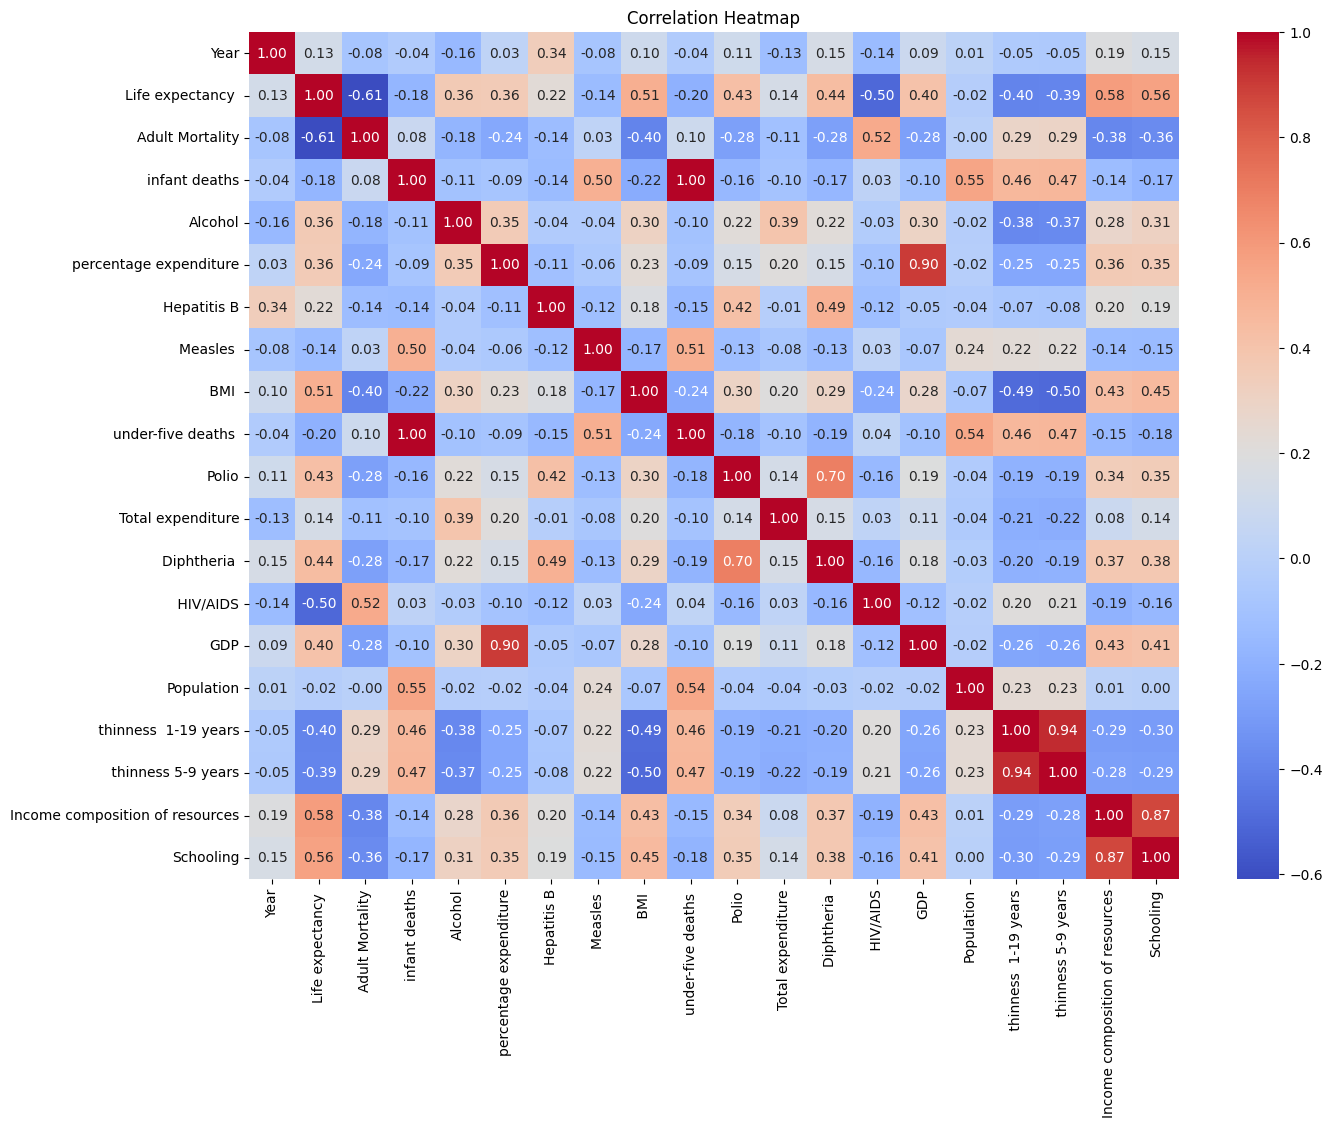

In [12]:
num_data = df.select_dtypes(include=['float64', 'int64'])
correlation = num_data.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

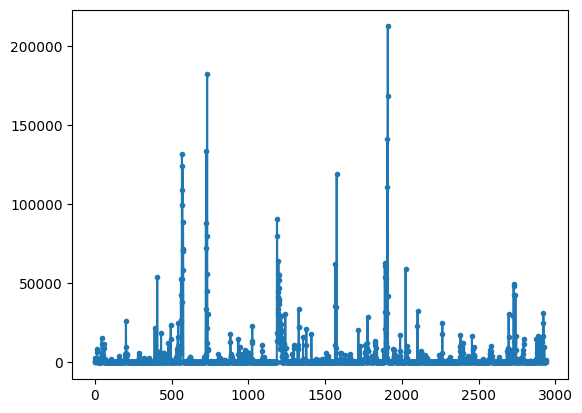

In [13]:
plt.plot(df['Measles '], '.-' , label = 'Hepatitis')
plt.show()

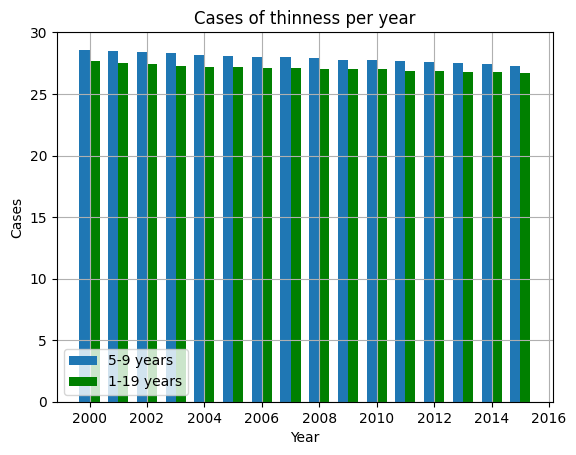

In [14]:
x = df['Year']
bar_width = 0.35
x1 = x - bar_width/2
x2 = x + bar_width/2

plt.bar(x1, df[' thinness 5-9 years'], width=bar_width, label='5-9 years')
plt.bar(x2, df[' thinness  1-19 years'], width=bar_width, label='1-19 years', color='g')
plt.title('Cases of thinness per year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

**Frecuencia en la esperanza de vida según el rango de edad**

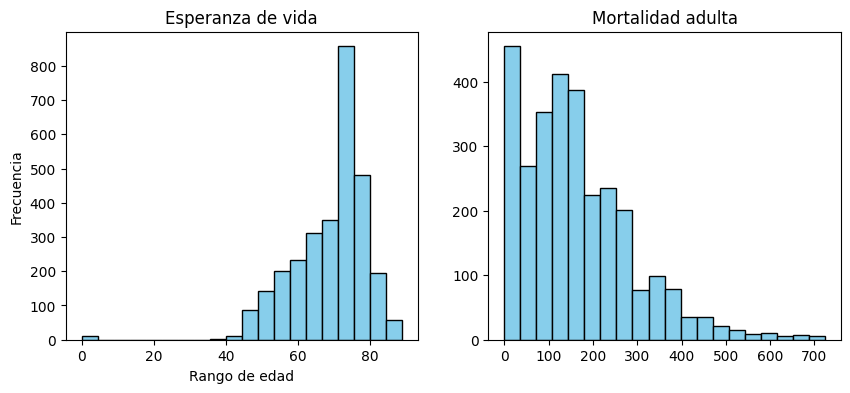

In [15]:
plt.figure(1, figsize= (10, 4))

plt.subplot(1,2,1)
plt.hist(df['Life expectancy '], bins=20, color='skyblue', edgecolor='black')
plt.title('Esperanza de vida')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(df['Adult Mortality'], bins=20, color='skyblue', edgecolor='black')
plt.title('Mortalidad adulta')

plt.show()

**Expectativa de vida a lo largo de los años en función del estado del país.**

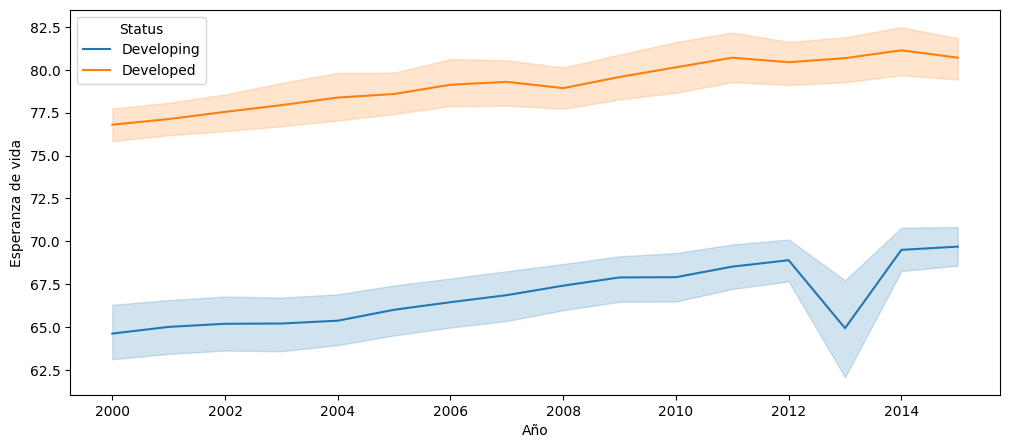

In [16]:
plt.figure(figsize = (12,5))
graphic = sns.lineplot(x = 'Year', y = 'Life expectancy ', hue = 'Status', data=df)
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.show()


**Porcentaje de datos presentes según estatus del país**

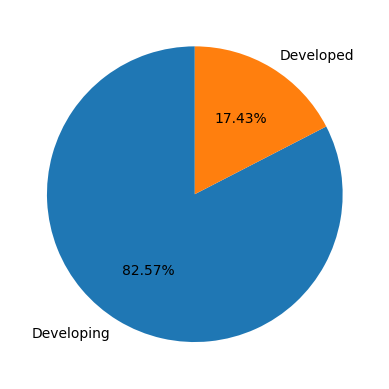

In [17]:
plt.pie(df['Status'].value_counts(), labels = df['Status'].value_counts().index,
        autopct = '%.2f%%', shadow = False, startangle=90)
plt.show()

**Prediction Model Training**

In [19]:
X = df.drop(['Life expectancy ', 'Country', 'Status'], axis=1)
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model Settings
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15, min_samples_split=2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


# Model Training
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Model validation
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculation
linear_rmse = (-linear_scores.mean()) ** 0.5
lasso_rmse = (-lasso_scores.mean()) ** 0.5
ridge_rmse = (-ridge_scores.mean()) ** 0.5
rf_rmse = (-rf_scores.mean()) ** 0.5
gb_rmse = (-gb_scores.mean()) ** 0.5

# Predictions
linear_predictions = linear_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)


# Performance Calculation
linear_mae = mean_absolute_error(y_test, linear_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Linear Regression RMSE:", linear_rmse)
print("Lasso RMSE:", lasso_rmse)
print("Ridge RMSE:", ridge_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)

print("\nLinear Regression MAE:", linear_mae)
print("Lasso MAE:", lasso_mae)
print("Ridge MAE:", ridge_mae)
print("Random Forest MAE:", rf_mae)
print("Gradient Boosting MAE:", gb_mae)

print("\nLinear Regression R^2:", linear_r2)
print("Lasso R^2:", lasso_r2)
print("Ridge R^2:", ridge_r2)
print("Random Forest R^2:", rf_r2)
print("Gradient Boosting R^2:", gb_r2)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.798e+04, tolerance: 2.201e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.80229e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.896e+04, tolerance: 2.503e+01
  model = cd

Linear Regression RMSE: 6.27905971990755
Lasso RMSE: 6.2657213882552
Ridge RMSE: 6.278905312757119
Random Forest RMSE: 2.7433858531437147
Gradient Boosting RMSE: 2.764798155662323

Linear Regression MAE: 3.620554058856398
Lasso MAE: 3.6381034078036647
Ridge MAE: 3.6204363076999075
Random Forest MAE: 1.225958230286336
Gradient Boosting MAE: 1.3787318712220764

Linear Regression R^2: 0.6541554647692908
Lasso R^2: 0.6466091663067406
Ridge R^2: 0.6541483822577042
Random Forest R^2: 0.9626392425245988
Gradient Boosting R^2: 0.9605951060444113


**Model Evaluation**

In [20]:
print(f'Puntuaciones de validación cruzada: {rf_scores}')
print(f'Media de puntuaciones: {rf_scores.mean()}')
print(f'Desviación estándar de puntuaciones: {rf_scores.std()}')

Puntuaciones de validación cruzada: [-6.25959288 -9.11054972 -6.30573631 -7.8382184  -8.11673239]
Media de puntuaciones: -7.526165939229067
Desviación estándar de puntuaciones: 1.1000066581383299


**Model Graphics**

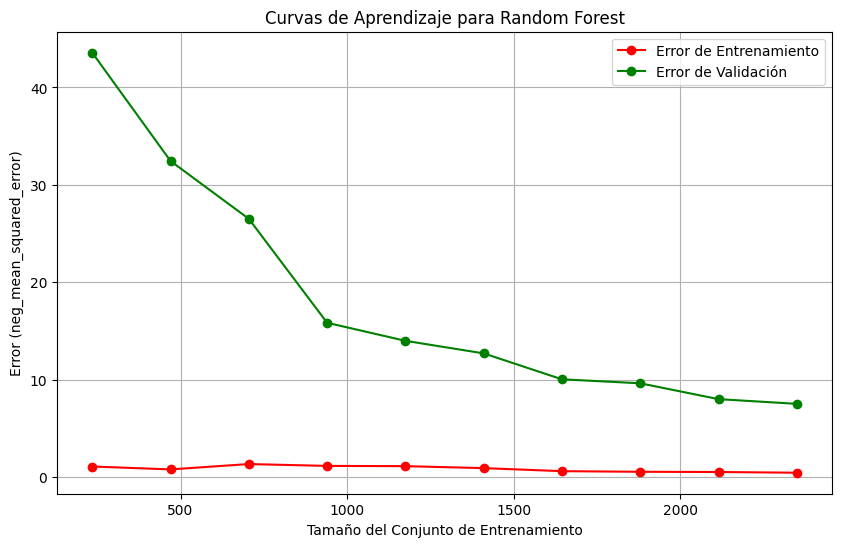

In [21]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Error de Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Error de Validación')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error (neg_mean_squared_error)')
plt.title('Curvas de Aprendizaje para Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()

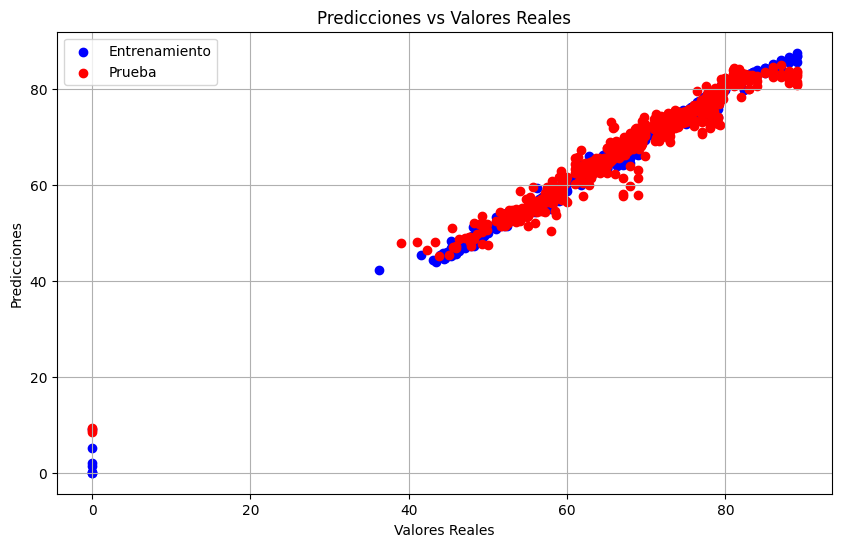

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_model.predict(X_train), color='blue', label='Entrenamiento')
plt.scatter(y_test, rf_model.predict(X_test), color='red', label='Prueba')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

**Model Saving**

In [23]:
predition_model_path = '../model/random_forest_model.pkl'
joblib.dump(rf_model, predition_model_path)

['../model/random_forest_model.pkl']